In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Vizualization

In [3]:
ts_data = pd.read_csv('./data/1-retail_daily_amount.csv', index_col='Date', parse_dates=True)

In [17]:
ts_data.head()

,Amount
Date,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05


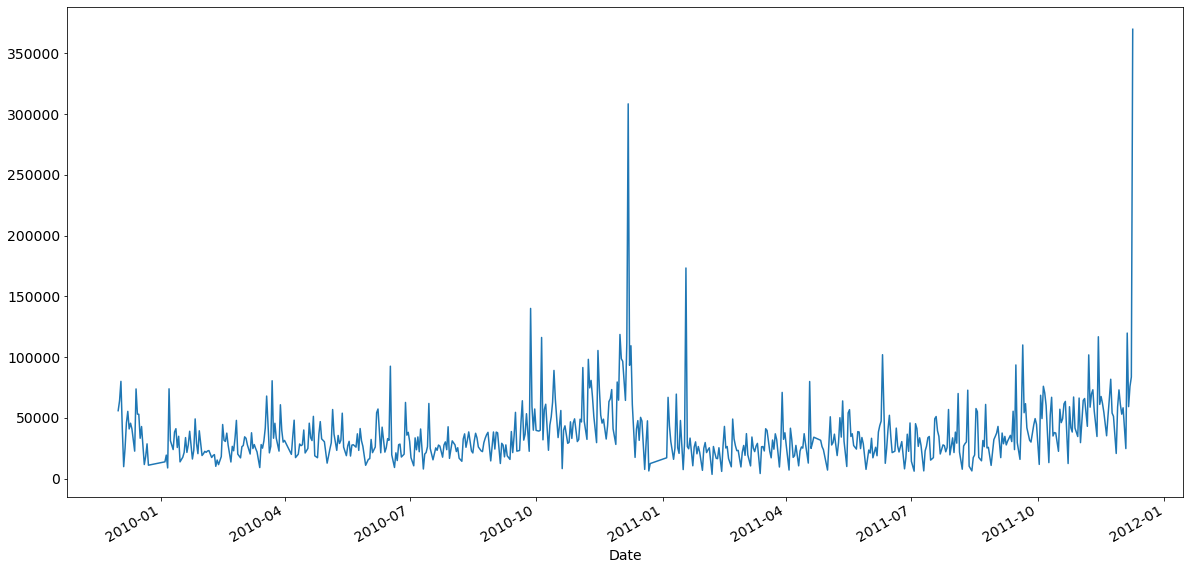

In [18]:
#Plot the time series

plt.figure(figsize=(20,10)) 
ts_data.Amount.plot().get_figure()
plt.show()

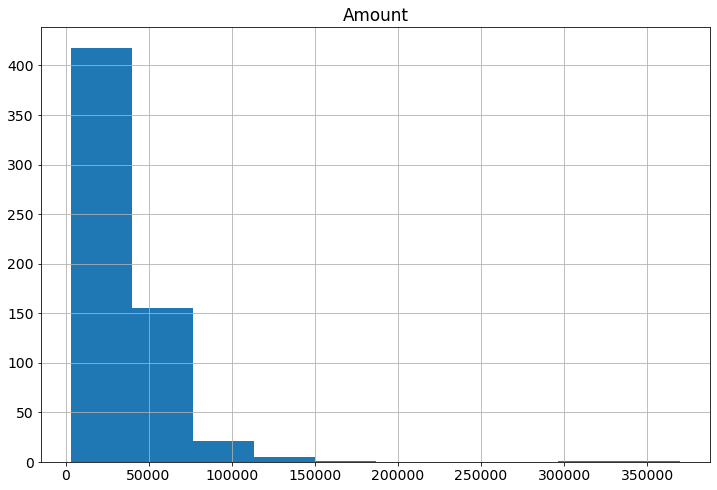

In [19]:
#Plot the histogram

ts_data.hist()
plt.show()

# Log Transform

In [20]:
#Log the Amount to make it more stable
log_data=ts_data.copy()
log_data['Amount'] = np.log(log_data['Amount'])

In [21]:
log_data.head()

,Amount
Date,
2009-12-01,10.930496
2009-12-02,11.065723
2009-12-03,11.289567
2009-12-04,10.624236
2009-12-05,9.190449


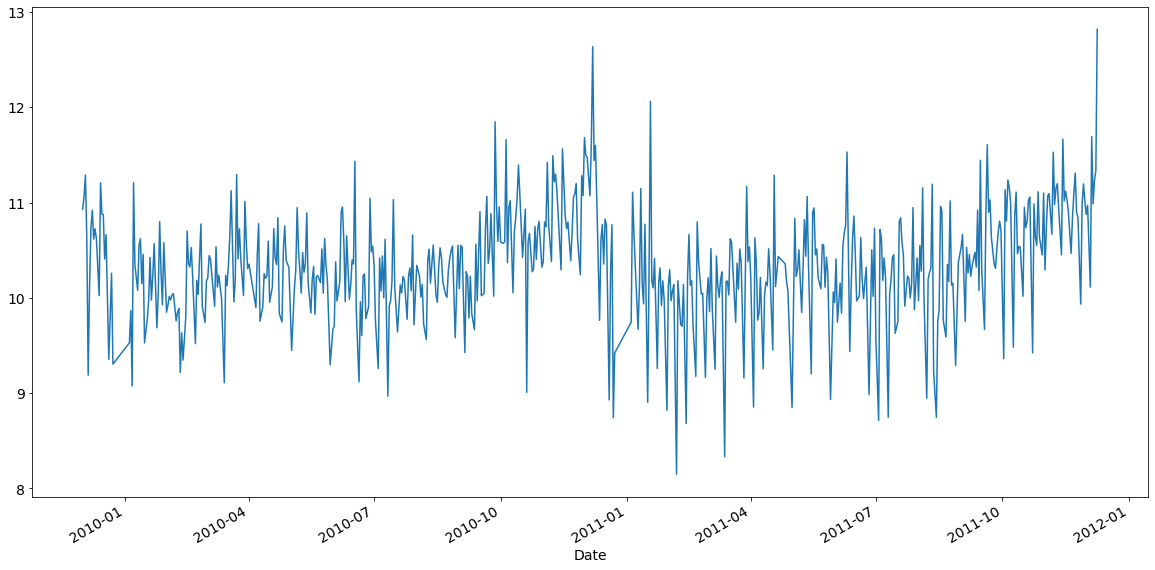

In [22]:
#Plot the time series with log
plt.figure(figsize=(20,10)) 
log_data.Amount.plot().get_figure()
plt.show()

# Moving Average and Smoothing

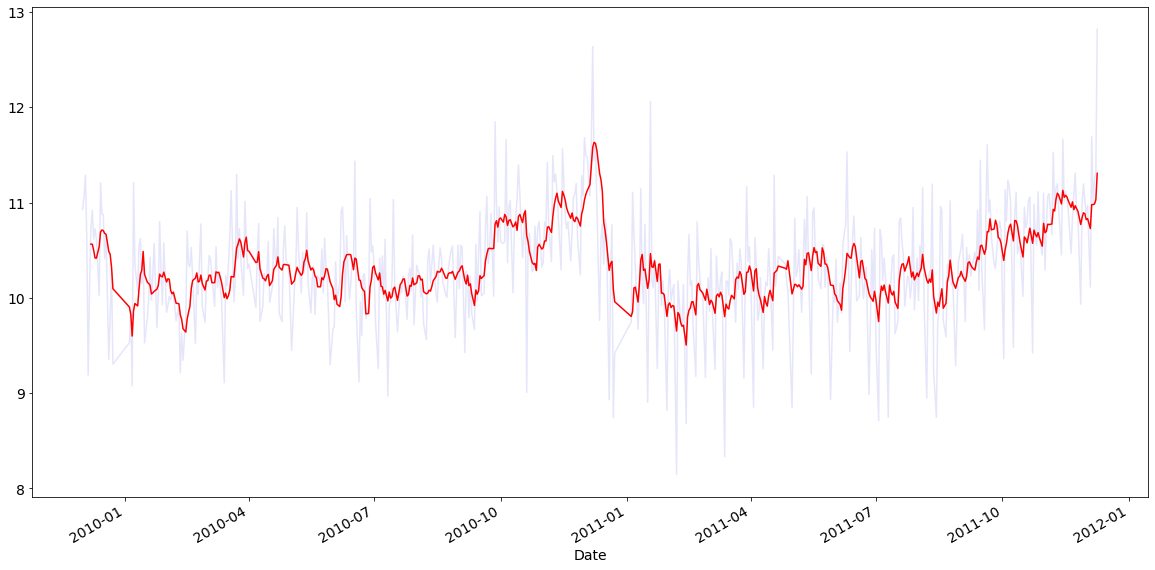

In [31]:
# Rolling - Now let's use the moving average with 7 days, to smooth the data reflecting the weekly tendency
plt.figure(figsize=(20,10)) 

log_data_roll = log_data.rolling(window=7)#7 days
log_data_r_mean = log_data_roll.mean().dropna()

log_data.Amount.plot(color='lavender')#Old data
log_data_r_mean.Amount.plot(color='red')#Moving-average data

plt.show()

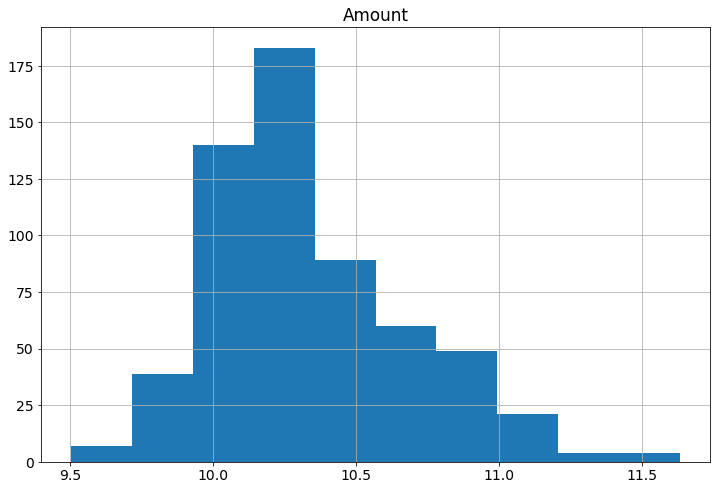

In [32]:
#Plot the histogram after log and smoothing

log_data_r_mean.hist()
plt.show()

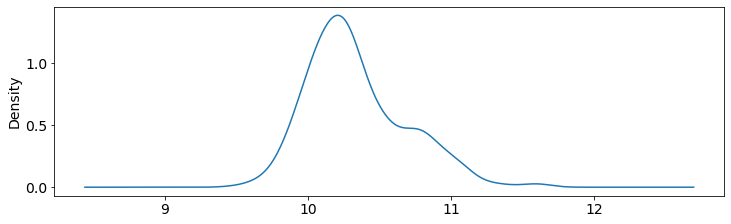

In [33]:
# density plot of time series
from pandas import read_csv
from matplotlib import pyplot
log_data_r_mean.hist()
pyplot.subplot(212)
log_data_r_mean.Amount.plot(kind='kde')
pyplot.show()

# Decomposing Time Series

Time series decomposition is a combination of level, trend, seasonality, and noise components. Decomposition can be useful for better understanding problems during time series analysis and forecasting. 
Decomposition is used for time series analysis, and as
an analysis tool it can be used to inform forecasting models on our problem. Helps in terms of modeling complexity and specially un terms of how to capture each componete (level, trend, seasonality, and noise) in a given model. 


### Application of Additive Model

The amplitude around the trend is ore or less constant, so we are going to use the additive model.  

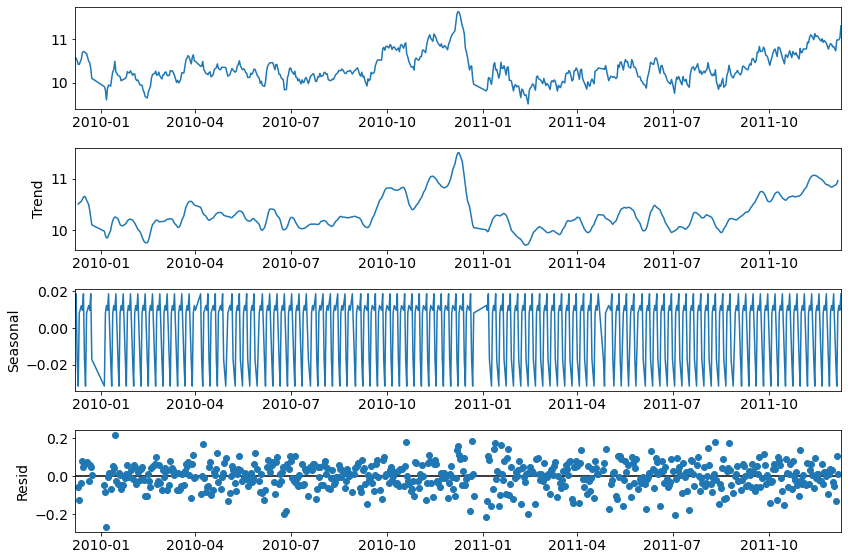

In [34]:
# components of time series

from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(log_data_r_mean, model='additive',period=6)
result.plot()
plt.show()

We can verify there is some residual points after removing seasonality and trend. Is also clear that after removing trend and residual points from the time series  we have seasonality in our data. Next, we are going to analyse better our seasonality.

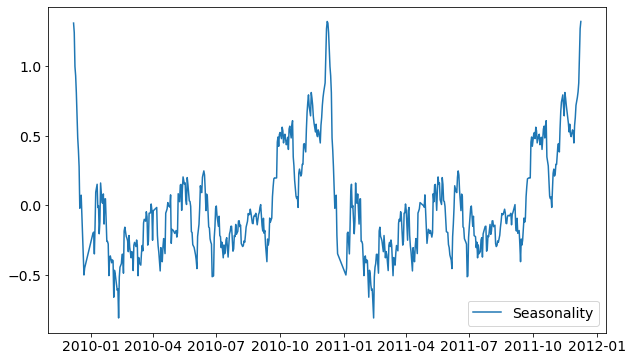

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10,6))

decomposition = seasonal_decompose(log_data_r_mean.dropna(),model='additive',period=298)
seasonal = decomposition.seasonal
#plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.show()

We can see a clear seasonality, with the sales increasing along the year until the Christmas time and decreasing abruptly just after that period.  

Observations from a non-stationary time series show seasonal efects, trends, and other structures
that depend on the time index. Summary statistics like the mean and variance do change over
time, providing a drift in the concepts a model may try to capture. Classical time series analysis
and forecasting methods are concerned with making non-stationary time series data stationary
by identifying and removing trends and removing seasonal efects.

# Stationarity - Unit root test (ADF test)

Statistical tests make strong assumptions about data. They can only be used to inform
the degree to which a null hypothesis can be rejected (or fail to be rejected). The result must
be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick
check and confrmatory evidence that time series is stationary or non-stationary.
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test1. The
intuition behind a unit root test is that it determines how strongly a time series is defined by a
trend.


Next we are going to use unit root test (Dickey-fuller test) to check if the series is stationary. We are going to verify in our original data and logarithmic data and with moving average and smoothing. 

### Original data

We are going to use the AIC criteria to let the test chose the optimal number of lags.

In [36]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(ts_data, autolag='AIC')
test1_result = pd.Series(test1[0:4], index=['ADF Test Statistic','P-Value','# Lags Used',
                                        '# Observations Used'])
print(test1_result)
print('')

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

ADF Test Statistic      -1.176208
P-Value                  0.683746
# Lags Used             17.000000
# Observations Used    584.000000
dtype: float64

We do not reject the H0: non-stationary time series <-> we have a unit root


P valeu is biger than 0.05, we don't regect the null hipostses, the null hipotisis statte that the time siries has a unit root. The serie is non stationary, the mean and variance are not constant, we are going to make the Serie stationary .

### Log data

In [37]:
from statsmodels.tsa.stattools import adfuller
test2 = adfuller(log_data_r_mean.dropna(), autolag='AIC')

test2_result = pd.Series(test2[0:4], index=['ADF Test Statistic','P-Value','# Lags Used',
                                        '# Observations Used'])
print(test2_result)
print('')


if test2[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

ADF Test Statistic      -1.680529
P-Value                  0.441172
# Lags Used             19.000000
# Observations Used    576.000000
dtype: float64

We do not reject the H0: non-stationary time series <-> we have a unit root


P valeu is biger than 0.05, we don't regect the null hipostses, the null hipotisis statte that the time siries has a unit root. The serie is non stationary, the mean and variance are not constant, we are going to make the Serie stationary .

## Stationarize data: log-returns (first difference of log-values)

Time series are stationary
if they do not have trend or seasonal efects. Summary statistics calculated on the time series
are consistent over time, like the mean or the variance of the observations. When a time series
is stationary, it can be easier to model. Statistical modeling methods assume or require the
time series to be stationary to be efective.

The series is non-stationary, We are going to use some methods to try to make the series stationary. First we are going to use the first difference of the logarithms.   

In [38]:
log_returns = np.log(ts_data).diff().dropna()
log_returns.head()

,Amount
Date,
2009-12-02,0.135227
2009-12-03,0.223844
2009-12-04,-0.665330
2009-12-05,-1.433787
2009-12-06,0.932579


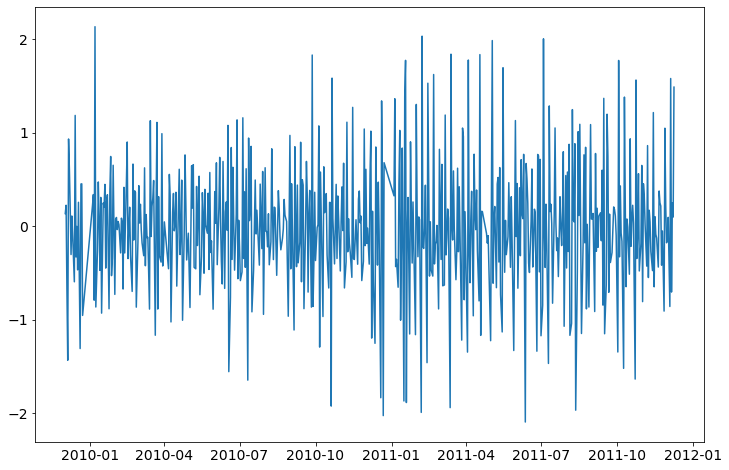

In [39]:
plt.plot(log_returns)
plt.show()

With the first difference of the logarithms we were able only to remove the trend, but the seasonality is still there. We can verify in the series that we still have repeated cycles. This repeating cycle may obscure the signal that we wish to model
when forecasting, and in turn may provide a strong signal to our predictive models.

In [40]:
## ADF unit root test
test3 = adfuller(log_returns, autolag='AIC')
test3_result = pd.Series(test3[0:4], index=['ADF Test Statistic','P-Value','# Lags Used',
                                        '# Observations Used'])
print(test3_result)
print('')
if test3[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

ADF Test Statistic    -9.091313e+00
P-Value                3.817566e-15
# Lags Used            1.600000e+01
# Observations Used    5.840000e+02
dtype: float64

We reject the H0: stationary time series <-> we don't have a unit root


P-Value is smaller than our 5% significance level, therefore we reject the null hypothesis that unit root does exist, the log_returns time series is stationary. We have an integrated stationary Serie of order 1. 

We have trend and seasonality in our original time series, to remove the trend, we are going to make the difference of order one, and to remove the seasonality we are going to make a differentiation of order 12. 

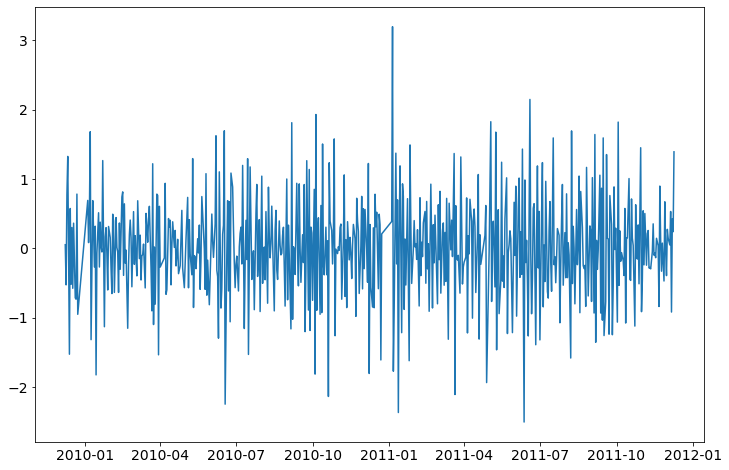

In [41]:
# Due to both trend and seasonal components, we apply one non-seasonal diff() and one seasonal differencing diff(6).
df_diff =  np.log(ts_data).diff().diff(6).dropna()
plt.plot(df_diff)
plt.show()

Now, we have the series without trend and seasonality, only with the aleatory side.  

## Correlogram: ACF and PACF

In [42]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

- **ACF** is an (complete) auto-correlation function which gives us values of auto-correlationof any series with its lagged values
- In simple terms, it describes how well the present valueof the series is related with its past values. 
- A time series can have components like trend,seasonality, cyclic and residual. ACF considers all these components while findingcorrelations hence it’s a ‘complete auto-correlation plot’.
- **PACF** is a partial auto-correlation function. 
- Basically instead of finding correlations ofpresent with lags like ACF, it finds correlation of the residuals (which remains afterremoving the effects which are already explained by the earlier lag(s)) with the next lagvalue hence ‘partial’ and not ‘complete’ as we remove already found variations before wefind the next correlation.
- So if there is any hidden information in the residual which canbe modeled by the next lag, we might get a good correlation and we will keep that nextlag as a feature while modeling.

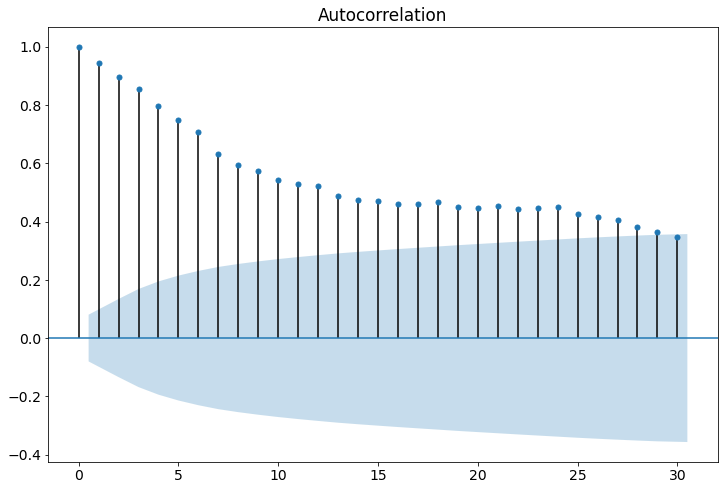

In [43]:
plot_acf(log_data_r_mean, lags=30, alpha=0.05)
plt.show()

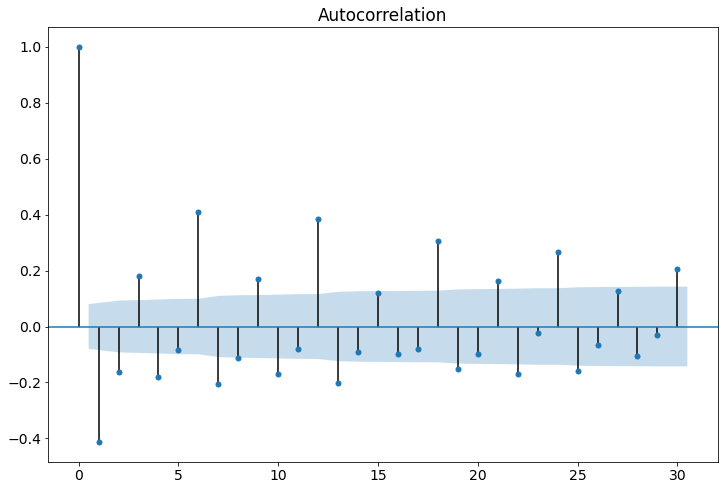

In [44]:
plot_acf(log_returns, lags=30, alpha=0.05)
plt.show()

In log-retuns data, as we verify before with Dickey-fuller test we still can se some seasonality. 

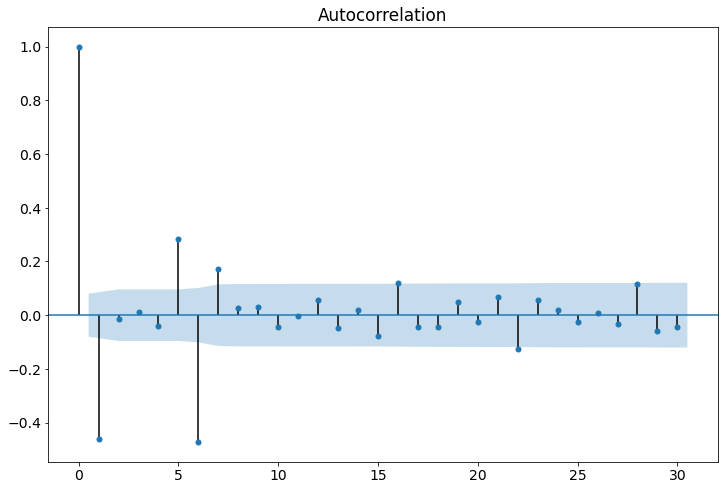

In [45]:
plot_acf(df_diff, lags=30, alpha=0.05)
plt.show()

With the difference of order one and a differentiation of order 12, we have almost white noise. We have autocorrelation 1 in the lag 0, then most correlation values are within the interval of confidence, but we still a few pics. So, we are not sure if it is only white noise, or there is still some significant correlation on the lag 1, 11 and 12.  

In [46]:
#Store data
log_data.to_csv("./data/2-retail_daily_amount_log.csv")#logarithmic data
log_data_r_mean.to_csv("./data/2-retail_daily_amount_log_r_mean.csv")#log data with Moving Average and Smoothing
log_returns.to_csv("./data/2-retail_daily_amount_log_returns.csv")#log and returns (no trend but has seasonality)
df_diff.to_csv("./data/2-retail_daily_amount_diff.csv")#(no trend and no seasonality)